# Introduction

#### In this Jupyter Notebook, I will be analysing the Iris dataset using various Python methods.
#### The following are tasks that I will complete in my analysis:
1. Import Libraries
2. Load the Dataset
    - I will load the Iris dataset using Pandas. 
3. Describe the Dataset
    - I will describe the Iris dataset and identify the feature names and species names.
4. Summarise the Features
    - I will write a script that outputs the summary of each variable into a single text file.
5. Explore the Dataset

        a. I will create a histogram for each feature. 
    
        b. I will create a boxplot for each feature. 
    
        c. I will create a scatterplot for each pair of features. 
    
        d. I will create a heatmap to display mean feature value per species. 

        e. I will create a pairplot to display the relationship between all features with one another.

# 1. Import Libraries

In [1]:
# Dataframes
import pandas as pd

# Numpy
import numpy as np

# ScikitLearn: Machine Learning repository that contains sample datasets
import sklearn as skl 
from sklearn import datasets

# Plots
import matplotlib
from matplotlib import pyplot as plt

# 2. Load the Dataset

#### I downloaded the Iris dataset from the UC Irvine Machine Learning Repository 
###### (See: https://archive.ics.uci.edu/dataset/53/iris).
#### I added the dataset (iris.csv) to my repository (zoeharlowe/pands-project).
#### I researched the Pandas pd.read_csv() documentation to find out how to set column names 
###### (See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [2]:
# Set column names
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Read in the dataset 
df = pd.read_csv("iris.csv", names = column_names)

# Display first 5 rows of the dataset
df.head(5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### I also displayed the last 5 rows of the dataset.

###### (See GeeksForGeeks article on df.head() and df.tail() function: https://www.geeksforgeeks.org/difference-between-pandas-head-tail-and-sample/)

In [3]:
# Display the last 5 rows of the dataset
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# 3. Describe the Dataset

#### I identified the feature names.

###### (See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html#pandas.DataFrame.columns) 
###### Microsoft Copilot autocompleted this code for me as I wasn't previously aware of the .values method

In [4]:
# Display feature names
column_names = df.columns.values
print(column_names)

['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'species']


#### I identified the three class types using the np.unique() function 
###### (See: https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [5]:
# Find unique values in the species column.
unique_values = np.unique(df["species"])

print(unique_values)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


#### I used the describe() function to find the count, mean, std, max, min, and first and third interquartiles of the dataset for each feature.
###### (See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 4. Summarise the Dataset

#### I created a text file (summary.txt) and used a for loop to write information about each feature into the text file.

#### I used this article on GeeksForGeeks to help me create the text file: https://www.geeksforgeeks.org/create-a-new-text-file-in-python/

#### Below you can see that I made a lambda function to find the number of features. I did this with the help of ChatGPT (See: https://chatgpt.com/share/68023853-726c-8000-901f-72d720dfc9bf)

In [7]:
# Create file
FILENAME = "summary.txt"

with open(FILENAME, 'w') as f:

    # Title
    f.write("Iris Dataset Summary\n")
    f.write("====================================\n\n")

    # Overall summary
    f.write("OVERALL SUMMARY\n")
    f.write(f"Shape of dataset: \t {df.shape} \n") # shape
    f.write(f"Number of species: \t {len(unique_values)} \n") # number of species

    # Number of features - I created a lambda function to count the number of features in each row
    float_count = df.apply(lambda row: sum(isinstance(x, float) for x in row), axis=1).iloc[0]
    f.write(f"Number of features:  {float_count} \n") # number of features
    
    f.write(f"Species names:\t\t {unique_values} \n") # species names
    f.write(f"Feature names:\t\t {column_names} \n") # variable names

#### Now that I have a general summary of the dataset, I want to talk about the variables in this dataset and give a summary of each one.

#### I used the df.describe() function again, converting the Panda series to a string using .to_string(). I used ChatGPT to help me with this and to explain to me that f.write only works with strings
###### (See: https://chatgpt.com/share/680b7005-0a00-8000-b664-43050f0d49e8)

In [8]:
# Setosa summary
# Open file in append mode to avoid overwriting the previous content
SUMMARY_FILE = "summary.txt"
with open(SUMMARY_FILE, 'a') as f:
    # Sepal length
    f.write("\nSEPAL LENGTH SUMMARY\n")
    f.write(df["sepal_length"].describe().to_string() + "\n")

    # Sepal width
    f.write("\nSEPAL WIDTH SUMMARY\n")
    f.write(df["sepal_width"].describe().to_string() + "\n")

    # Petal length
    f.write("\nPETAL LENGTH SUMMARY\n")
    f.write(df["petal_length"].describe().to_string() + "\n")

    # Petal width
    f.write("\nPETAL WIDTH SUMMARY\n")
    f.write(df["petal_width"].describe().to_string() + "\n")

    # Species
    f.write("\nSPECIES SUMMARY\n")
    f.write(df["species"].describe().to_string() + "\n")

# 5. Explore the Dataset

#### I will now create various plots to analyse and explore this dataset. 
#### Before I do so, I used Numpy to create arrays to make it easier for me to plot each feature.
###### (See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html)

In [24]:
# Sepal width
sepal_width = df["sepal_width"]
sepal_width = sepal_width.to_numpy()

# Sepal length
sepal_length = df["sepal_length"]
sepal_length = sepal_length.to_numpy()

# Petal width
petal_width = df["petal_width"]
petal_width = petal_width.to_numpy()

# Petal length
petal_length = df["petal_length"]
petal_length = petal_length.to_numpy()

# Species
species = df["species"]
species = species.to_numpy()

# Setosa sepal width
setosa_sepal_width = df[df["species"] == "Iris-setosa"]["sepal_width"].to_numpy()

# Versicolor sepal width
versicolor_sepal_width = df[df["species"] == "Iris-versicolor"]["sepal_width"].to_numpy()

# Virginica sepal width
virginica_sepal_width = df[df["species"] == "Iris-virginica"]["sepal_width"].to_numpy()

# Setosa sepal length
setosa_sepal_length = df[df["species"] == "Iris-setosa"]["sepal_length"].to_numpy()

# Versicolor sepal length
versicolor_sepal_length = df[df["species"] == "Iris-versicolor"]["sepal_length"].to_numpy()

# Virginica sepal length
virginica_sepal_length = df[df["species"] == "Iris-virginica"]["sepal_length"].to_numpy()

# Setosa petal width
setosa_petal_width = df[df["species"] == "Iris-setosa"]["petal_width"].to_numpy()

# Versicolor petal width
versicolor_petal_width = df[df["species"] == "Iris-versicolor"]["petal_width"].to_numpy()

# Virginica petal width
virginica_petal_width = df[df["species"] == "Iris-virginica"]["petal_width"].to_numpy()

# Setosa petal length
setosa_petal_length = df[df["species"] == "Iris-setosa"]["petal_length"].to_numpy()

# Versicolor petal length
versicolor_petal_length = df[df["species"] == "Iris-versicolor"]["petal_length"].to_numpy()

# Virginica petal length
virginica_petal_length = df[df["species"] == "Iris-virginica"]["petal_length"].to_numpy()


## a. Histogram
#### Using the Matplotlib plt.hist() function, I plotted five histograms - one for each feature/variable.

###### (See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

### **Histogram displaying Sepal Width:**

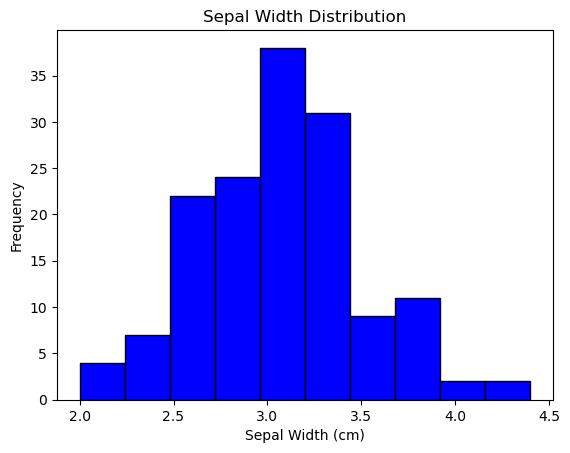

In [32]:
# Histogram of sepal width with set colour customisation and bin width
plt.hist(sepal_width, bins=10, color='blue', edgecolor='black')

# Add axis labels
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')

# Add title
plt.title('Sepal Width Distribution')

# Save the histogram to a file
plt.savefig("histogram_sepal_width.png")

# Show
plt.show()

### **Histogram displaying Sepal Length:**

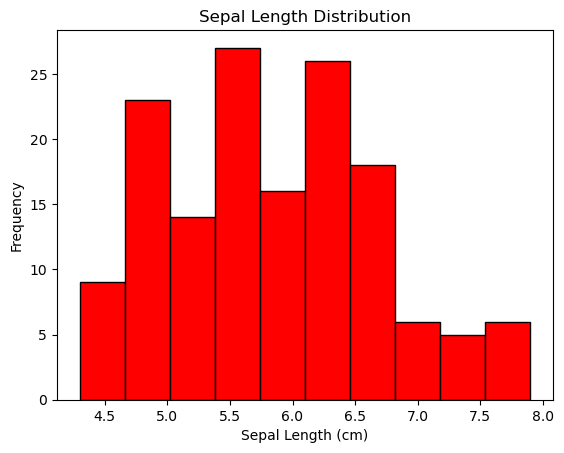

In [33]:
# Histogram of sepal length with set colour customisation and bin width
plt.hist(sepal_length, bins=10, color='red', edgecolor='black')

# Add axis labels
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')

# Add title
plt.title('Sepal Length Distribution')

# Save the histogram to a file
plt.savefig("histogram_sepal_length.png")

# Show
plt.show()


### **Histogram displaying Petal Width:**

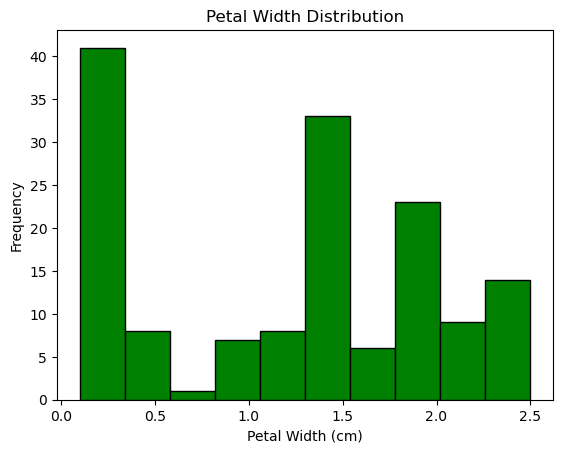

In [34]:
# Histogram of petal width with set colour customisation and bin width
plt.hist(petal_width, bins=10, color='green', edgecolor='black')

# Add axis labels
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')

# Add title
plt.title('Petal Width Distribution')

# Save the histogram to a file
plt.savefig("histogram_petal_width.png")

# Show
plt.show()

### **Histogram displaying Petal Length:**

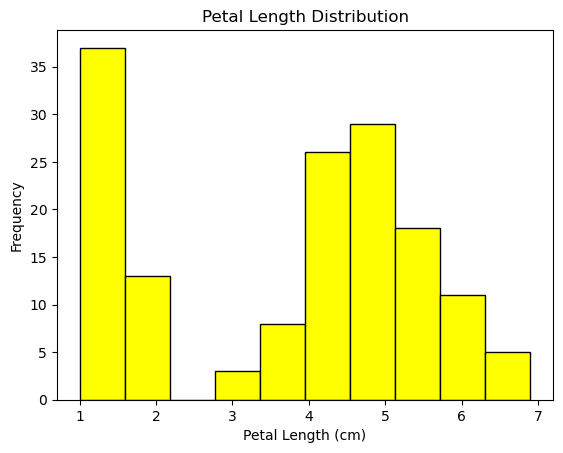

In [35]:
# Histogram of petal length with set colour customisation and bin width
plt.hist(petal_length, bins=10, color='yellow', edgecolor='black')

# Add axis labels
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')

# Add title
plt.title('Petal Length Distribution')

# Save the histogram to a file
plt.savefig("histogram_petal_length.png")

# Show
plt.show()

## b. Boxplot

#### Using the plt.boxplot() fucnction, I created box plots of the each feature for each of the three classes (Setosa, Versicolor and Virginica).
##### Each graph displays the 3 classes of Iris flower, with each box all placed beside one another for easier comparison. (See information on multiple datasets in one boxplot: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/)
##### I used ChatGPT for applying colours using for loops below: https://chatgpt.com/share/68090395-151c-8000-b018-be5c812b4ee9

### **Boxplot displaying Sepal Width:**

C:\Users\ZMH\AppData\Local\Temp\ipykernel_17956\2026768369.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_to_plot, patch_artist=True, labels=["Setosa", "Versicolor", "Virginica"])


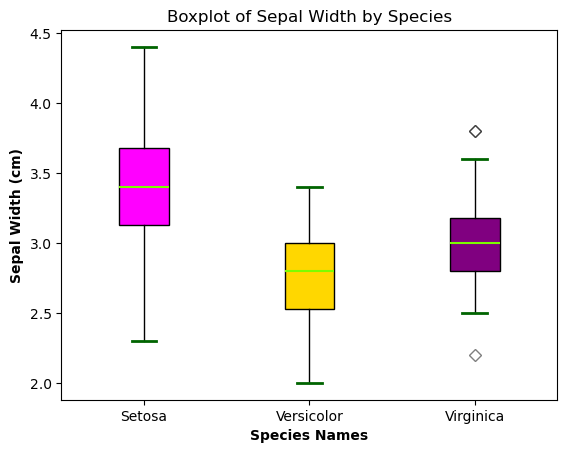

In [ ]:
# List of features to represent in boxplot
data_to_plot = [setosa_sepal_width, versicolor_sepal_width, virginica_sepal_width]

# Create boxplot
bp = plt.boxplot(data_to_plot, patch_artist=True, labels=["Setosa", "Versicolor", "Virginica"])

# Title
plt.title("Boxplot of Sepal Width by Species")

# Axis labels
plt.ylabel("Sepal Width (cm)", fontweight='bold')
plt.xlabel("Species Names", fontweight='bold')

# Box colours
# Set colours using a list
colors = ["magenta", "gold", "purple"]

# ChatGPT to apply colours: https://chatgpt.com/share/68090395-151c-8000-b018-be5c812b4ee9
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='darkblue',
              alpha = 0.5)

# Changing colour and linewidth of caps
for cap in bp['caps']:
    cap.set(color ='darkgreen',
            linewidth = 2)
    
# Changing colour and linewidth of median
for median in bp['medians']:
    median.set(color ='lawngreen',
               linewidth = 1.5)
    
# Save the boxplot to a file
plt.savefig("boxplot_sepal_width.png")


### **Boxplot displaying Sepal Length:**

C:\Users\ZMH\AppData\Local\Temp\ipykernel_17956\3824969423.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_to_plot, patch_artist=True, labels=["Setosa", "Versicolor", "Virginica"])


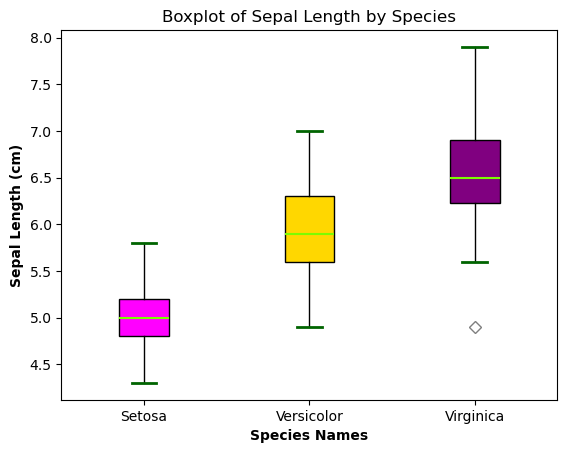

In [37]:
# List of features to represent in boxplot
data_to_plot = [setosa_sepal_length, versicolor_sepal_length, virginica_sepal_length]

# Create boxplot
bp = plt.boxplot(data_to_plot, patch_artist=True, labels=["Setosa", "Versicolor", "Virginica"])

# Title
plt.title("Boxplot of Sepal Length by Species")

# Axis labels
plt.ylabel("Sepal Length (cm)", fontweight='bold')
plt.xlabel("Species Names", fontweight='bold')

# Box colours
# Set colours using a list
colors = ["magenta", "gold", "purple"]

# ChatGPT to apply colours: https://chatgpt.com/share/68090395-151c-8000-b018-be5c812b4ee9
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='darkblue',
              alpha = 0.5)

# Changing colour and linewidth of caps
for cap in bp['caps']:
    cap.set(color ='darkgreen',
            linewidth = 2)
    
# Changing colour and linewidth of median
for median in bp['medians']:
    median.set(color ='lawngreen',
               linewidth = 1.5)
    
# Save the boxplot to a file
plt.savefig("boxplot_sepal_length.png")

# Show.
plt.show()

### **Boxplot displaying Petal Width:**

C:\Users\ZMH\AppData\Local\Temp\ipykernel_17956\3726050615.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_to_plot, patch_artist=True, labels=["Setosa", "Versicolor", "Virginica"])


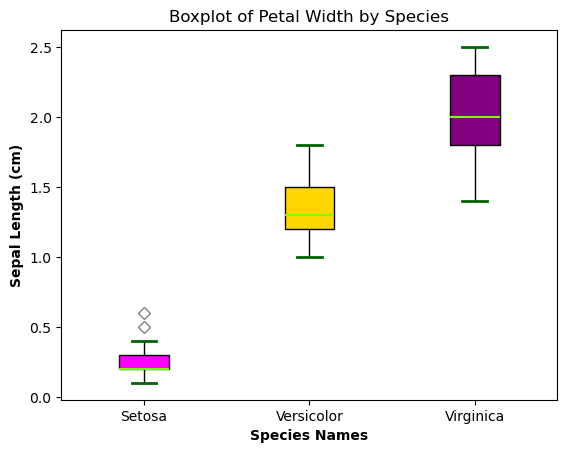

In [38]:
# List of features to represent in boxplot
data_to_plot = [setosa_petal_width, versicolor_petal_width, virginica_petal_width]

# Create boxplot
bp = plt.boxplot(data_to_plot, patch_artist=True, labels=["Setosa", "Versicolor", "Virginica"])

# Title
plt.title("Boxplot of Petal Width by Species")

# Axis labels
plt.ylabel("Sepal Length (cm)", fontweight='bold')
plt.xlabel("Species Names", fontweight='bold')

# Box colours
# Set colours using a list
colors = ["magenta", "gold", "purple"]

# ChatGPT to apply colours: https://chatgpt.com/share/68090395-151c-8000-b018-be5c812b4ee9
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='darkblue',
              alpha = 0.5)

# Changing colour and linewidth of caps
for cap in bp['caps']:
    cap.set(color ='darkgreen',
            linewidth = 2)
    
# Changing colour and linewidth of median
for median in bp['medians']:
    median.set(color ='lawngreen',
               linewidth = 1.5)
    
# Save the boxplot to a file
plt.savefig("boxplot_petal_width.png")

# Show.
plt.show()

### **Boxplot displaying Petal Length:**

C:\Users\ZMH\AppData\Local\Temp\ipykernel_17956\838019535.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_to_plot, patch_artist=True, labels=["Setosa", "Versicolor", "Virginica"])


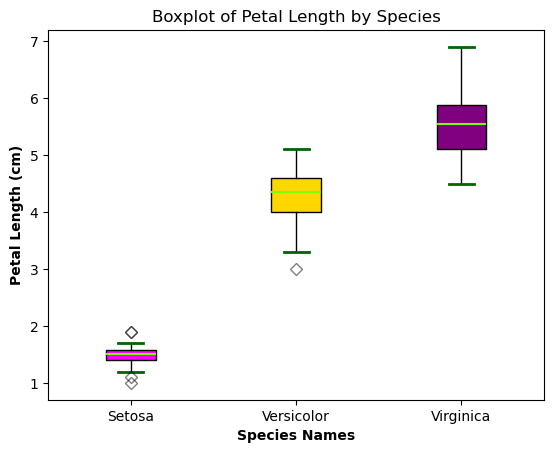

In [39]:
# List of features to represent in boxplot
data_to_plot = [setosa_petal_length, versicolor_petal_length, virginica_petal_length]

# Create boxplot
bp = plt.boxplot(data_to_plot, patch_artist=True, labels=["Setosa", "Versicolor", "Virginica"])

# Title
plt.title("Boxplot of Petal Length by Species")

# Axis labels
plt.ylabel("Petal Length (cm)", fontweight='bold')
plt.xlabel("Species Names", fontweight='bold')

# Box colours
# Set colours using a list
colors = ["magenta", "gold", "purple"]

# ChatGPT to apply colours: https://chatgpt.com/share/68090395-151c-8000-b018-be5c812b4ee9
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='darkblue',
              alpha = 0.5)

# Changing colour and linewidth of caps
for cap in bp['caps']:
    cap.set(color ='darkgreen',
            linewidth = 2)
    
# Changing colour and linewidth of median
for median in bp['medians']:
    median.set(color ='lawngreen',
               linewidth = 1.5)
    
# Save the boxplot to a file
plt.savefig("boxplot_petal_length.png")

# Show.
plt.show()